In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X=[i for i in range(-50,50)]

In [3]:
def normalization(mean,dev,x):
    x=float(x)
    y=(1/(2*dev**2)**0.5)*(2.71)**(-(x-mean)**2/(2*dev**2))
    return y


In [4]:
Y=[normalization(5,10,i) for i in X]

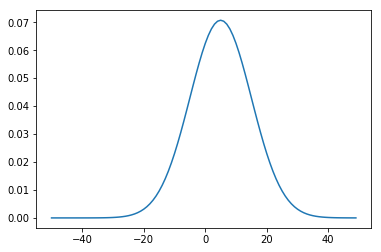

In [5]:
plt.plot(X,Y)

In [6]:
X_train=np.array(X)
print(type(X_train))
X_train=X_train.reshape((X_train.shape[0],1))
print(X_train.shape)
ones=np.ones((X_train.shape[0],1))
print(ones.shape)
X_train=np.hstack((ones,X_train))
print(X_train.shape)
Y_train=np.array(Y)
print(Y_train.shape)

<class 'numpy.ndarray'>
(100, 1)
(100, 1)
(100, 2)
(100,)


In [7]:
def weight(x,query_x,t):
    return np.exp(np.dot((query_x-x).T,(query_x-x))/(-2*t*t))

In [8]:
w=np.diag(np.ones((X_train.shape[0],)))
print(w.shape)

(100, 100)


In [9]:
def closed_form_sol_weighted(X,Y,w,query_x):
    X_trans=np.transpose(X)
    Y_trans=np.transpose(Y)
    a=[weight(X[i],query_x,10) for i in range(X.shape[0])]
    w=np.diag(a)
    theta=(np.linalg.inv(np.dot(X_trans,w).dot(X))).dot(np.dot(X_trans,w).dot(Y))
    return theta
def hypothesis(theta,x):
    return np.dot(theta,x)
def score(X,Y,Y_pred):
    ss_tot=0
    ss_res=0
    y_mean=np.mean(Y)
    for i in range(Y.shape[0]):
        ss_res=ss_res+(Y[i]-Y_pred[i])**2
        ss_tot=ss_tot+(Y[i]-y_mean)**2
    return 1-ss_res/ss_tot

In [10]:
res=[]
for i in range(X_train.shape[0]):
    a=closed_form_sol_weighted(X_train,Y_train,w,X_train[i])
    res.append(hypothesis(a,X_train[i]))

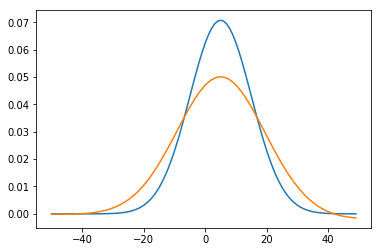

In [11]:
plt.plot(X,Y)
plt.plot(X,res)

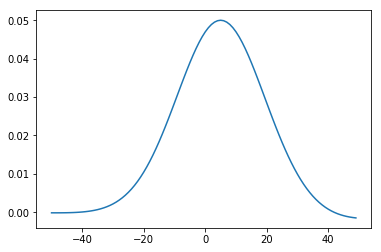

In [12]:
plt.plot(X,res)

In [13]:
print("The validation score is:{0:.3f}".format(score(X_train,Y_train,res)))

The validation score is:0.888


In [14]:
score(X_train,Y_train,res)

0.8880567195159146

In [4]:
normalization(65,25,35)

0.013797712902317327